# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Rasya Rachman Hakim
- **Email:** rasya.hakim.rh@gmail.com
- **ID:** 7442977

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh dari variabel cuaca terhadap jumlah penyewaan sepeda?

- Berapa banyak jumlah penyewaan sepeda berdasarkan musim dari tahun 2011 sampai 2012

## Import Semua Packages/Library yang Digunakan

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

pada proses ini kita akan memproses data

### Gathering Data

In [87]:
hourly_data = pd.read_csv('/content/drive/MyDrive/hour.csv')
daily_data = pd.read_csv('/content/drive/MyDrive/day.csv')

### Assessing Data

memeriksa apakah data sudah benar dan melihat statistiknya

In [88]:
# Informasi data pada setiap jamnya
print('Karakteristik data perjamnya')
print('Number of Rows:', hourly_data.shape[0])
print('Number of Columns:', hourly_data.shape[1])

Karakteristik data perjamnya
Number of Rows: 17379
Number of Columns: 17


melihat tampilan data setiap jamnya

In [89]:
hourly_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [90]:
# mencetak informasi tentang karakteristik data per jam, khususnya jumlah baris dan kolom dalam dataset
print('Daily Data Characteristics')
print('Number of Rows:', daily_data.shape[0])
print('Number of Columns:', daily_data.shape[1])

Daily Data Characteristics
Number of Rows: 731
Number of Columns: 16


In [91]:
daily_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Daily Data


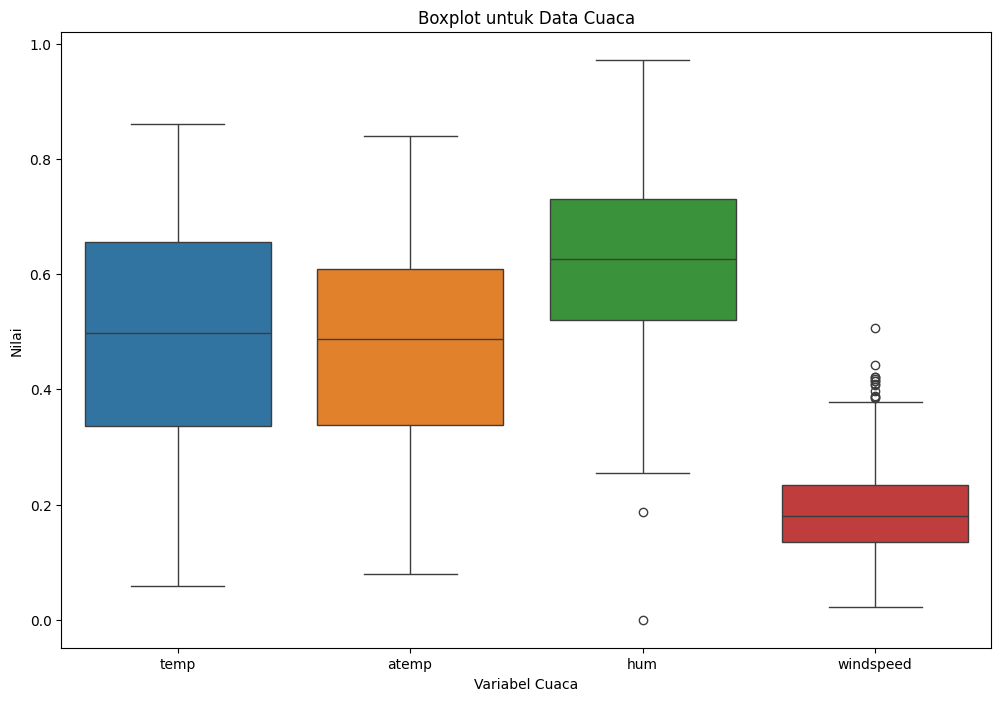

In [92]:
print('Daily Data')
plt.figure(figsize=(12, 8))
sns.boxplot(data=daily_data[['temp', 'atemp' ,'hum', 'windspeed']])
plt.title('Boxplot untuk Data Cuaca')
plt.xlabel('Variabel Cuaca')
plt.ylabel('Nilai')
plt.show()

### Cleaning Data

Mengecheck apakah data terdapat data yang bermasalah lalu memperbaikinya

dan memeriksa apakah ada data yang NULL

In [93]:
print('data perjam', hourly_data.isnull().sum())

data perjam instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [94]:
print('data perhari:', daily_data.isnull().sum())

data perhari: instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


Mengubah tipe data dteday yang sebelumnya merupakan object menjadi date

In [95]:
hourly_data['dteday'] = pd.to_datetime(hourly_data['dteday']).dt.strftime('%Y-%m-%d')
daily_data['dteday'] = pd.to_datetime(daily_data['dteday']).dt.strftime('%Y-%m-%d')

Menghilangkan beberapa kolom yang tidak diperlukan seperti atemp

In [96]:
hourly_data = hourly_data.drop(['instant', 'atemp'], axis=1)
daily_data = daily_data.drop(['instant', 'atemp'], axis=1)


Mengecheck adanya outliers menggunakan boxplot

Daily Data


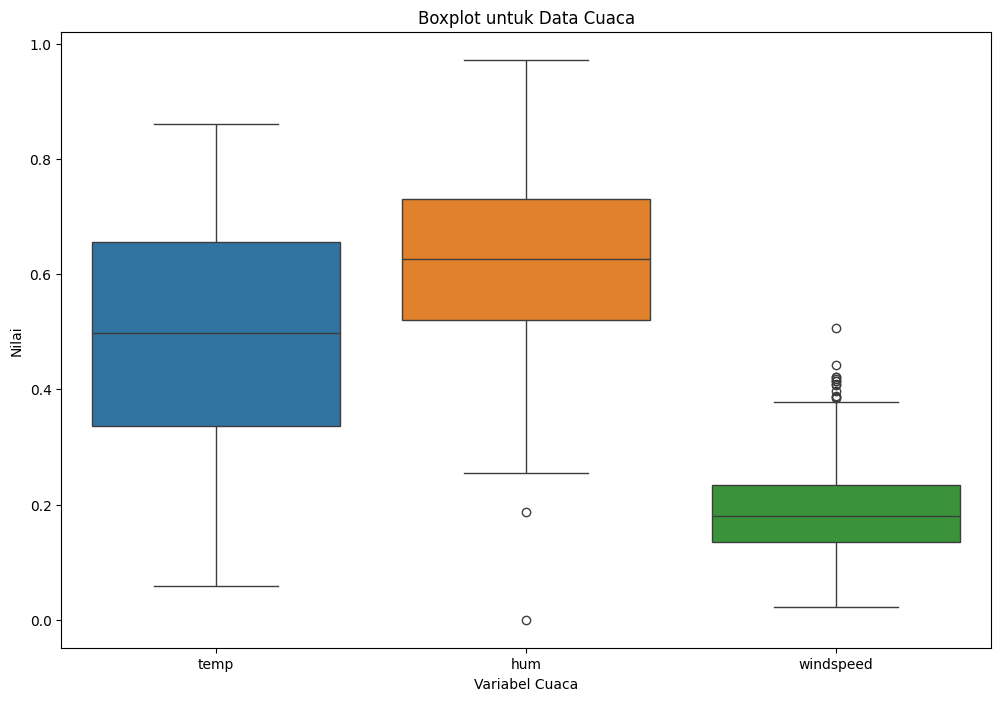

In [97]:
print('Daily Data')
plt.figure(figsize=(12, 8))
sns.boxplot(data=daily_data[['temp', 'hum', 'windspeed']])
plt.title('Boxplot untuk Data Cuaca')
plt.xlabel('Variabel Cuaca')
plt.ylabel('Nilai')
plt.show()

Mengurangi outliers dengan menggunakan metode IQR

In [98]:
# Calculate IQR
Q1 = hourly_data['hum'].quantile(0.25)
Q3 = hourly_data['hum'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter outliers
hourly_data = hourly_data[(hourly_data['hum'] >= lower_bound) & (hourly_data['hum'] <= upper_bound)]
daily_data = daily_data[(daily_data['hum'] >= lower_bound) & (daily_data['hum'] <= upper_bound)]

## Exploratory Data Analysis (EDA)

### Explore ...


mengeksplor karakteristik dataset

melihat baris dan kolom dalam datast

In [99]:
# Information about Hourly Data
print('Hourly Data Characteristics')
print('Number of Rows:', hourly_data.shape[0])
print('Number of Columns:', hourly_data.shape[1])

Hourly Data Characteristics
Number of Rows: 17357
Number of Columns: 15


Melihat tipe data dalam dataset

In [100]:
print('Data Types of Columns')
print(hourly_data.dtypes)

Data Types of Columns
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object


melihat deskripsi datast yang merupakan data angka dan melihat statistiknya

In [101]:
print('Summary of Columns')
hourly_data.describe(include='all')

Summary of Columns


,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
count,17357,17357.000000,17357.000000,17357.000000,17357.000000,17357.000000,17357.000000,17357.000000,17357.000000,17357.000000,17357.000000,17357.000000,17357.000000,17357.000000,17357.000000
unique,730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2.503543,0.503198,6.542260,11.545889,0.028807,3.002420,0.682318,1.423403,0.497124,0.628024,0.190007,35.718788,153.948551,189.667339
std,NaN,1.106327,0.500004,3.438645,6.914537,0.167268,2.006728,0.465588,0.637492,0.192635,0.191754,0.122342,49.321693,151.382189,181.409297
min,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.080000,0.000000,0.000000,0.000000,1.000000
25%,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.480000,0.104500,4.000000,34.000000,40.000000
50%,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.630000,0.194000,17.000000,116.000000,142.000000
75%,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.780000,0.253700,48.000000,220.000000,281.000000


melihat outliers dalam data

Hourly Data


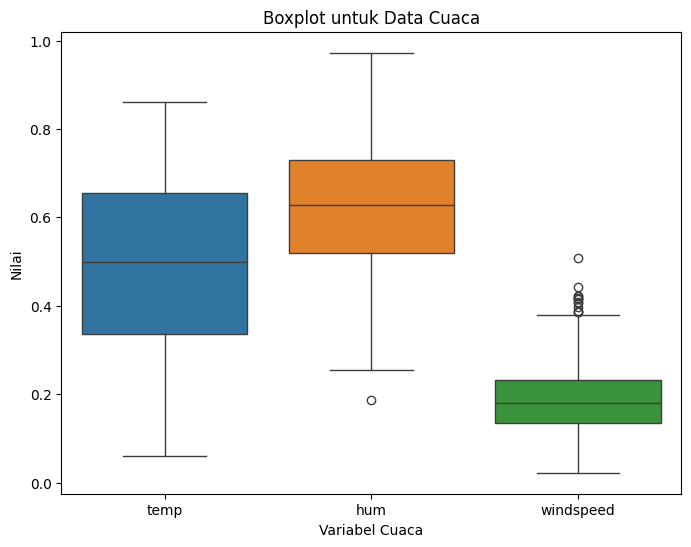

In [102]:
print('Hourly Data')
plt.figure(figsize=(8, 6))
sns.boxplot(data=daily_data[['temp', 'hum', 'windspeed']])
plt.title('Boxplot untuk Data Cuaca')
plt.xlabel('Variabel Cuaca')
plt.ylabel('Nilai')
plt.show()

In [103]:
# outlier setelah dikurangi
print('Daily Data Characteristics')
print('Number of Rows:', daily_data.shape[0])
print('Number of Columns:', daily_data.shape[1])

Daily Data Characteristics
Number of Rows: 730
Number of Columns: 14


In [104]:
print('Data Types of Columns')
print(daily_data.dtypes)

Data Types of Columns
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object


In [105]:
print('Summary of Columns')
daily_data.describe(include='all')

Summary of Columns


,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
count,730,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
unique,730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2.498630,0.501370,6.524658,0.028767,2.995890,0.683562,1.393151,0.495530,0.628754,0.190388,849.275342,3660.390411,4509.665753
std,NaN,1.110184,0.500341,3.451815,0.167266,2.005817,0.465405,0.542015,0.183134,0.140614,0.077506,686.449738,1557.149836,1933.194931
min,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.187917,0.022392,2.000000,20.000000,22.000000
25%,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.336875,0.520521,0.134950,316.250000,2502.250000,3169.750000
50%,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.499167,0.627083,0.180971,717.000000,3664.500000,4548.500000
75%,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655625,0.730313,0.233207,1096.500000,4783.250000,5966.000000


## Visualization & Explanatory Analysis

### Pertanyaan 1:

Bagaimana pengaruh dari variabel cuaca terhadap jumlah penyewaan sepeda?

data perjam

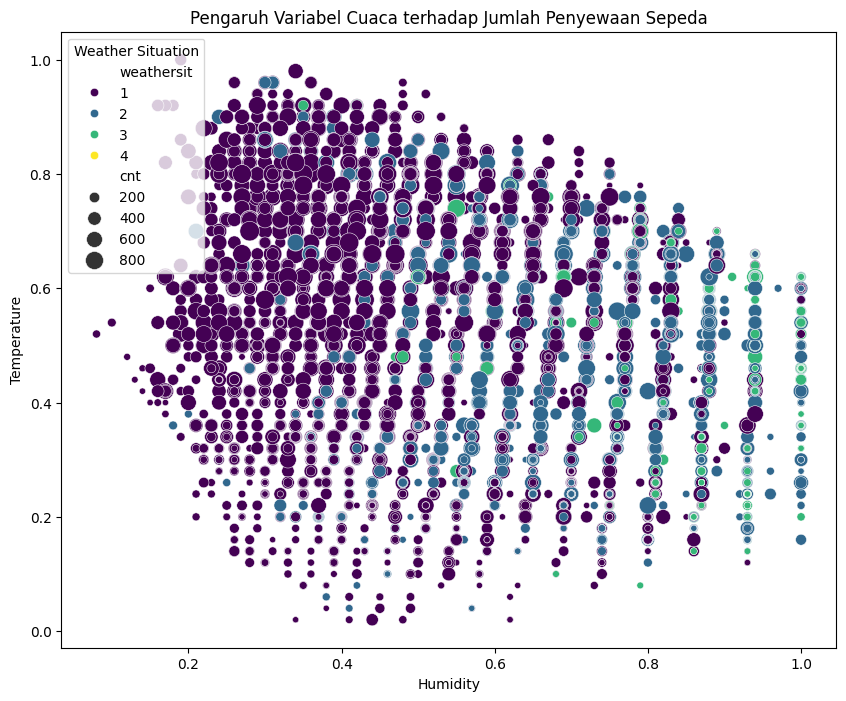

In [106]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=hourly_data, x='hum', y='temp', size='cnt', hue='weathersit', palette='viridis', sizes=(20, 200))
plt.title('Pengaruh Variabel Cuaca terhadap Jumlah Penyewaan Sepeda')
plt.xlabel('Humidity')
plt.ylabel('Temperature')
plt.legend(title='Weather Situation')
plt.show()

data perhari

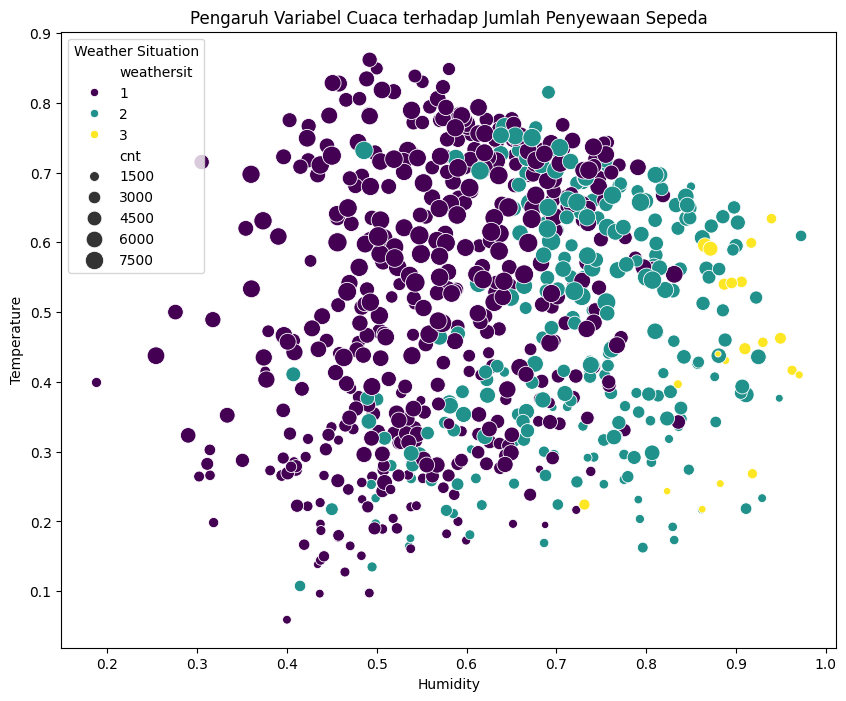

In [107]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=daily_data, x='hum', y='temp', size='cnt', hue='weathersit', palette='viridis', sizes=(20, 200))
plt.title('Pengaruh Variabel Cuaca terhadap Jumlah Penyewaan Sepeda')
plt.xlabel('Humidity')
plt.ylabel('Temperature')
plt.legend(title='Weather Situation')
plt.show()

### Pertanyaan 2:

Berapa banyak jumlah penyewaan sepeda berdasarkan musim dari tahun 2011 sampai 2012

data perjam

season  yr
1       0     149377
        1     321348
2       0     347316
        1     571273
3       0     419650
        1     641479
4       0     326137
        1     515476
Name: cnt, dtype: int64


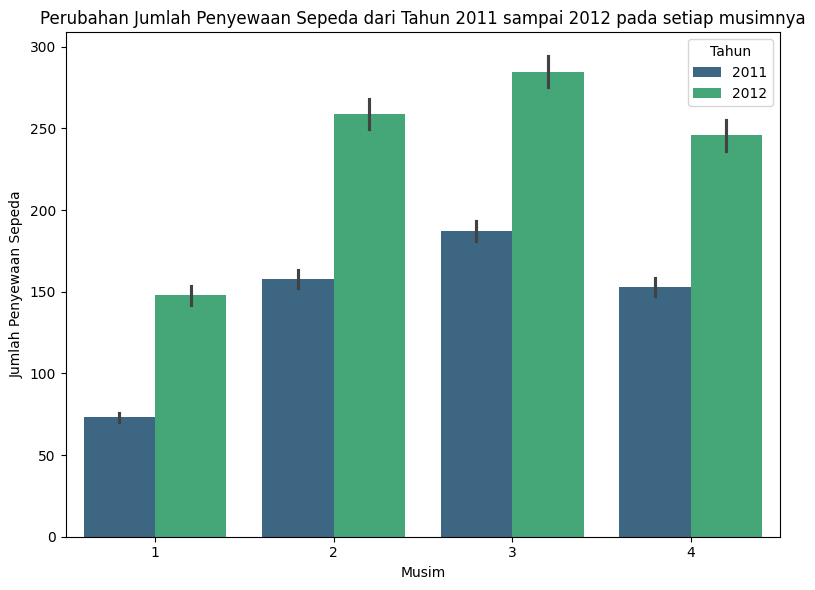

In [108]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=hourly_data, x='season', y='cnt', hue='yr', palette='viridis')
plt.title('Perubahan Jumlah Penyewaan Sepeda dari Tahun 2011 sampai 2012 pada setiap musimnya')
plt.xlabel('Musim')
plt.ylabel('Jumlah Penyewaan Sepeda')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['2011', '2012'], title='Tahun')
labels = daily_data.groupby(['season', 'yr'])['cnt'].sum()
print(labels)
plt.tight_layout()
plt.show()

data harian

season  yr
1       0     149377
        1     321348
2       0     347316
        1     571273
3       0     419650
        1     641479
4       0     326137
        1     515476
Name: cnt, dtype: int64


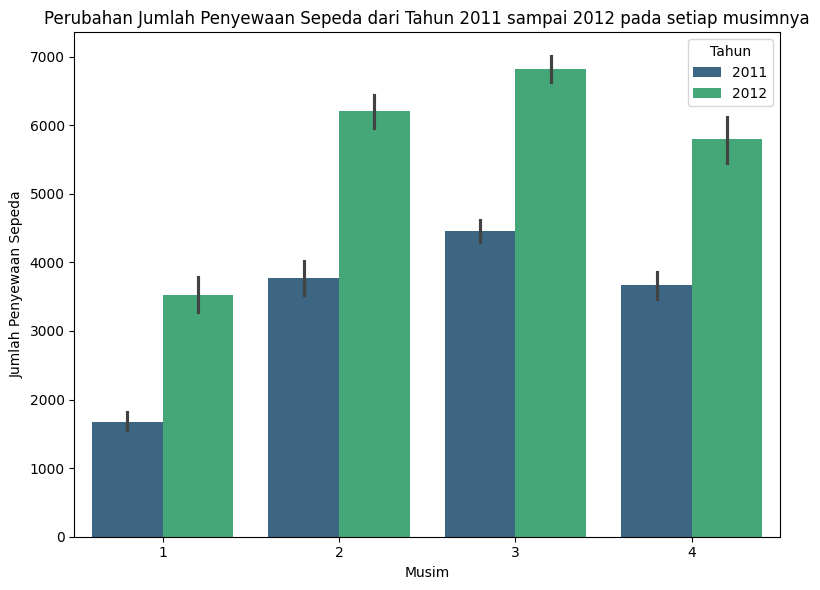

In [109]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=daily_data, x='season', y='cnt', hue='yr', palette='viridis')
plt.title('Perubahan Jumlah Penyewaan Sepeda dari Tahun 2011 sampai 2012 pada setiap musimnya')
plt.xlabel('Musim')
plt.ylabel('Jumlah Penyewaan Sepeda')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['2011', '2012'], title='Tahun')
labels = daily_data.groupby(['season', 'yr'])['cnt'].sum()
print(labels)
plt.tight_layout()
plt.show()

## Conclusion

- Variabel cuaca, termasuk suhu udara, kelembaban, dan kondisi cuaca, memiliki pengaruh signifikan terhadap penyewaan sepeda, seperti terlihat dalam scatterplot. Cuaca cerah dan hangat terkait dengan peningkatan tajam dalam penyewaan, sementara cuaca buruk atau suhu rendah menyebabkan penurunan. Oleh karena itu, perusahaan penyewaan sepeda perlu mengadopsi strategi responsif terhadap prakiraan cuaca, seperti penyesuaian pemasaran, penawaran promosi khusus, atau layanan tambahan. Kesimpulannya, variabel cuaca memainkan peran penting dalam menentukan tingkat penyewaan sepeda, dan adaptabilitas terhadap kondisi cuaca menjadi kunci dalam mengoptimalkan bisnis penyewaan sepeda.


- Peningkatan lebih dari 10% dalam penyewaan sepeda dari 2011 ke 2012 menunjukkan tren positif dalam minat masyarakat terhadap layanan tersebut. Meskipun demikian, tren musiman menunjukkan penurunan signifikan selama musim semi, kemungkinan dipengaruhi oleh cuaca yang lebih hangat. Ini mengindikasikan bahwa strategi khusus, seperti kampanye atau paket promosi, mungkin diperlukan untuk meningkatkan minat dalam penyewaan sepeda selama musim-musim dengan kunjungan yang lebih rendah. Dengan demikian, perusahaan penyewaan sepeda dapat mengoptimalkan pendapatan dan pelayanan sepanjang tahun.